In [1]:
import pandas as pd
df = pd.read_csv('Dataset/recruitment_data.csv', sep=',')

df.head(5)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [2]:
#Procura se existe algum dado nulo na base de dados
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [8]:
#Treinar o modelo normalizador para os dados numéricos
#pq normalizar os dados? garantir para que os padrões não afetem as outras variáveis.
from sklearn import preprocessing
from pickle import dump

dados_numericos = df

normalizador = preprocessing.MinMaxScaler()
modelo_normalizador = normalizador.fit(dados_numericos) #vai guardar os coeficientes aplicados entre os dados numéricos para que fique entre 0 e 1

#Normalizar a base de dados de entrada
dados_numericos_normalizados = modelo_normalizador.transform(dados_numericos)

#Criar um Data Frame com os dados normalizados (categóricos e numéricos)
#Converter os dados numéricos normalizados em Data Frame
dados_normalizados_final = pd.DataFrame(data=dados_numericos_normalizados, columns=dados_numericos.columns)


dados_normalizados_final
dump(modelo_normalizador, open('Models/normalizador_recruitments.pkl', 'wb'))

In [9]:
dados_normalizados_final.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,0.200000,1.0,0.333333,0.000000,0.50,0.515450,0.48,0.78,0.91,0.0,1.0
1,0.633333,1.0,1.000000,0.800000,0.50,0.497013,0.35,0.68,0.80,0.5,1.0
2,0.933333,0.0,0.333333,0.200000,0.25,0.177927,0.20,0.67,0.13,0.5,0.0
3,0.466667,1.0,0.333333,0.333333,0.25,0.107611,0.36,0.27,0.70,1.0,0.0
4,0.333333,0.0,0.000000,0.400000,0.00,0.842135,0.23,0.52,0.85,0.5,0.0


In [10]:
#CLUSTERIZAÇÃO
#Determinar o número ótimo de grupos pela distorção
from sklearn.cluster import KMeans  #Clusterizador
import matplotlib.pyplot as plt   #Para gráficos
import math  #Matemática
from scipy.spatial.distance import cdist  #Para calcular a distância e distorções
import numpy as np  #Para procedimentos numéricos


distortions = []
K = range (1, 101)  #Vetor que vai de 1 a 100

#os clusters são as classes/grupos gerados

for i in K:
  #treinar iterativamente conforme n_cluster = K[i]
  dados_kmeans_model = KMeans(n_clusters = i).fit(dados_normalizados_final)     #fit = treina       #i = quantos clusters eu quero
  distortions.append(
      sum(np.min(
          cdist(dados_normalizados_final, dados_kmeans_model.cluster_centers_, 'euclidean'), axis = 1)/dados_normalizados_final.shape[0])
          #pega os centroides e calcula as distâncias e divide pelo tamanho da base(shape[0])
          #pega a soma da menor distorção(a menor distância do centróide) e manda para a lista de distortions
    )

print(distortions)

C:\Users\Alberth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alberth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alberth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

[1.1386223108704834, 1.0235674448585308, 0.93067812838993, 0.8892607919762503, 0.8693377948547404, 0.8497916546419002, 0.8392643813282399, 0.8289910794639366, 0.8210350019179097, 0.8116911452513662, 0.8040839582484766, 0.7950882038877424, 0.7881276887025609, 0.7817046234629281, 0.7766174240297067, 0.7696451804951493, 0.7626926695838158, 0.7586077113057095, 0.7532750632492087, 0.7463258836723153, 0.7422437318394719, 0.7394570905588626, 0.7354168339134147, 0.7314873046322901, 0.7261319162877173, 0.7214829712490958, 0.7190169295479555, 0.7152804075241574, 0.7114754289048519, 0.70695292129468, 0.705288104816948, 0.7032571823145407, 0.7000212163205255, 0.6962912738428215, 0.6928659704173973, 0.6900510446927736, 0.6887917267494162, 0.6851706423167703, 0.6824733743769807, 0.6795101066569459, 0.6758967604773851, 0.6756814683906448, 0.6725587693345046, 0.6704046499826312, 0.6680299302310175, 0.6662726139518044, 0.662617707859139, 0.6607278218910942, 0.6587499301707275, 0.653406236354909, 0.6547

In [11]:
len(distortions)

100

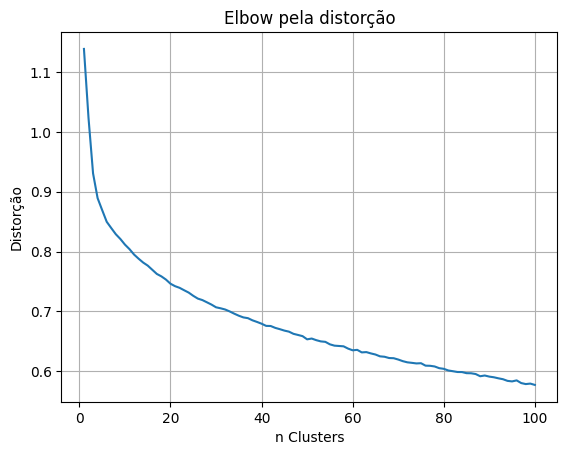

In [12]:
#Exibir o gráfico das distorções
fig, ax = plt.subplots()
ax.plot(K, distortions)
ax.set(xlabel = 'n Clusters', ylabel = 'Distorção', title = 'Elbow pela distorção')
ax.grid()
fig.savefig('elbow_distorcao.png')
plt.show()

#Quanto mais centroide, maior a distorção

In [17]:
#Calcular o número ótimo de clusters
x0 = K[0]
y0 = distortions[0]
xn = K[len(K)-1]
yn = distortions[len(distortions)-1]

#Iterar nos pontos gerados durante os treinamentos preliminares
distancias = []
for i in range(len(distortions)):
  x = K[i]
  y = distortions[i]
  #distância sempre será absoluto.
  numerador = abs((yn - y0)*x - (xn-x0)*y + xn*y0 - yn*x0)  #cálculo da distância entre 2 pontos
  denominador = math.sqrt((yn - y0) ** 2 + (xn - x0) ** 2)  #calcula o módulo da distância entre 2 pontos
  distancias.append(numerador/denominador)

#Maior distância
n_clusters_otimo = K[distancias.index(np.max(distancias))]

#treinar o modelo definitivo
kmeans_model = KMeans(n_clusters = n_clusters_otimo, random_state=42).fit(dados_normalizados_final)     #fit = treina       #i = quantos clusters eu quero

#salvar o modelo definitivo
from pickle import dump
dump(kmeans_model, open('Models/recruitment_clusters_2024.pkl', 'wb'))

C:\Users\Alberth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
print(n_clusters_otimo)

17


In [44]:
from pickle import load
from sklearn.cluster import KMeans


recruitment_kmeans_model = load(open("Models/recruitment_clusters_2024.pkl", "rb"))
normalizador = load(open("Models/normalizador_recruitments.pkl", "rb"))

idx_aleatorio = np.random.randint(0, len(dados_normalizados_final))

nova_instancia_aleatoria = dados_normalizados_final.iloc[[idx_aleatorio]]  #localizar pela linha
nova_instancia_aleatoria

idx_aleatorio = np.random.randint(0, len(dados_normalizados_final))

instancia_aleatoria = dados_normalizados_final.iloc[[idx_aleatorio]]

nova_instancia_normalizada = normalizador.transform(nova_instancia_aleatoria)

dados_normalizados_final_df = pd.DataFrame(data=nova_instancia_aleatoria, columns=dados_numericos.columns)

dados_normalizados_final_df

grupo_predito = kmeans_model.predict(instancia_aleatoria)[0]

print('Grupo predito:', grupo_predito)

# Obter o centróide
centroide = kmeans_model.cluster_centers_[grupo_predito]

centroide = centroide.reshape(-1, 11)


centroide_df = pd.DataFrame(centroide, columns=dados_numericos.columns)

centroide_legivel = normalizador.inverse_transform(centroide)

# Transformar o centróide legível em um DataFrame
df_centroide_legivel = pd.DataFrame(data=centroide_legivel, columns=dados_numericos.columns)

# Exibir o DataFrame do centróide legível
print("\nDados do centróide (legiveis):")
print(df_centroide_legivel.to_string(index=False))


Grupo predito: 8

Dados do centróide (legiveis):
      Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  RecruitmentStrategy  HiringDecision
37.043103     1.0        1.887931        11.551724           3.939655            21.494423       29.793103   49.715517         42.603448             2.112069             0.0
